# 0.) Import and Clean data

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [56]:
#drive.mount('/content/gdrive/', force_remount = True)

In [57]:
df = pd.read_csv("bank2.csv", sep = ";")

In [58]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [59]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [60]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [61]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

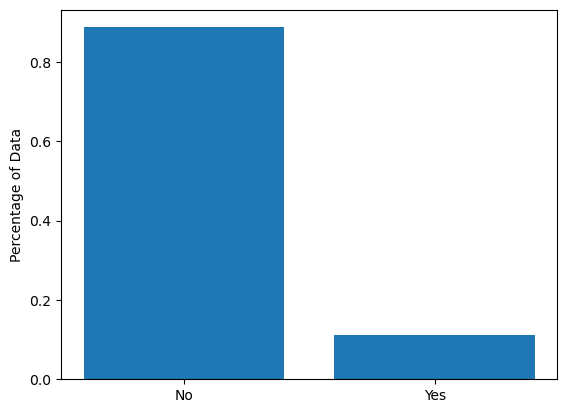

In [62]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [63]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [64]:
###############
###TRANSFORM###
###############

#smotenc = SMOTENC(sampling_strategy=gamma, categorical_features=['job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous	poutcome	emp.var.rate	cons.price.idx	cons.conf.idx	euribor3m	nr.employed	y])
#X_resampled, y_resampled = smotenc.fit_resample(X_train, y_train)

smote = SMOTE(sampling_strategy=0.5, random_state = 333)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_train)

X_scaled = X_resampled
y_train = y_resampled 

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [65]:
dtree_base = DecisionTreeClassifier(max_depth = 3)
dtree = dtree_base.fit(X_scaled, y_train)

[Text(0.5, 0.875, 'x[1] <= -0.015\ngini = 0.444\nsamples = 38370\nvalue = [25580, 12790]\nclass = No'),
 Text(0.25, 0.625, 'x[1] <= -0.395\ngini = 0.235\nsamples = 21128\nvalue = [18256, 2872]\nclass = No'),
 Text(0.125, 0.375, 'x[70] <= 4.161\ngini = 0.106\nsamples = 12826\nvalue = [12106, 720]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.091\nsamples = 12591\nvalue = [11987, 604]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 235\nvalue = [119, 116]\nclass = No'),
 Text(0.375, 0.375, 'x[20] <= 1.315\ngini = 0.384\nsamples = 8302\nvalue = [6150, 2152]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.461\nsamples = 5767\nvalue = [3689, 2078]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.057\nsamples = 2535\nvalue = [2461, 74]\nclass = No'),
 Text(0.75, 0.625, 'x[20] <= 1.322\ngini = 0.489\nsamples = 17242\nvalue = [7324, 9918]\nclass = Yes'),
 Text(0.625, 0.375, 'x[1] <= 1.027\ngini = 0.443\nsamples = 13265\nvalue = [4385, 8880]\nclass = Yes'),
 Text(0.5625, 0.125, 'gini = 0.

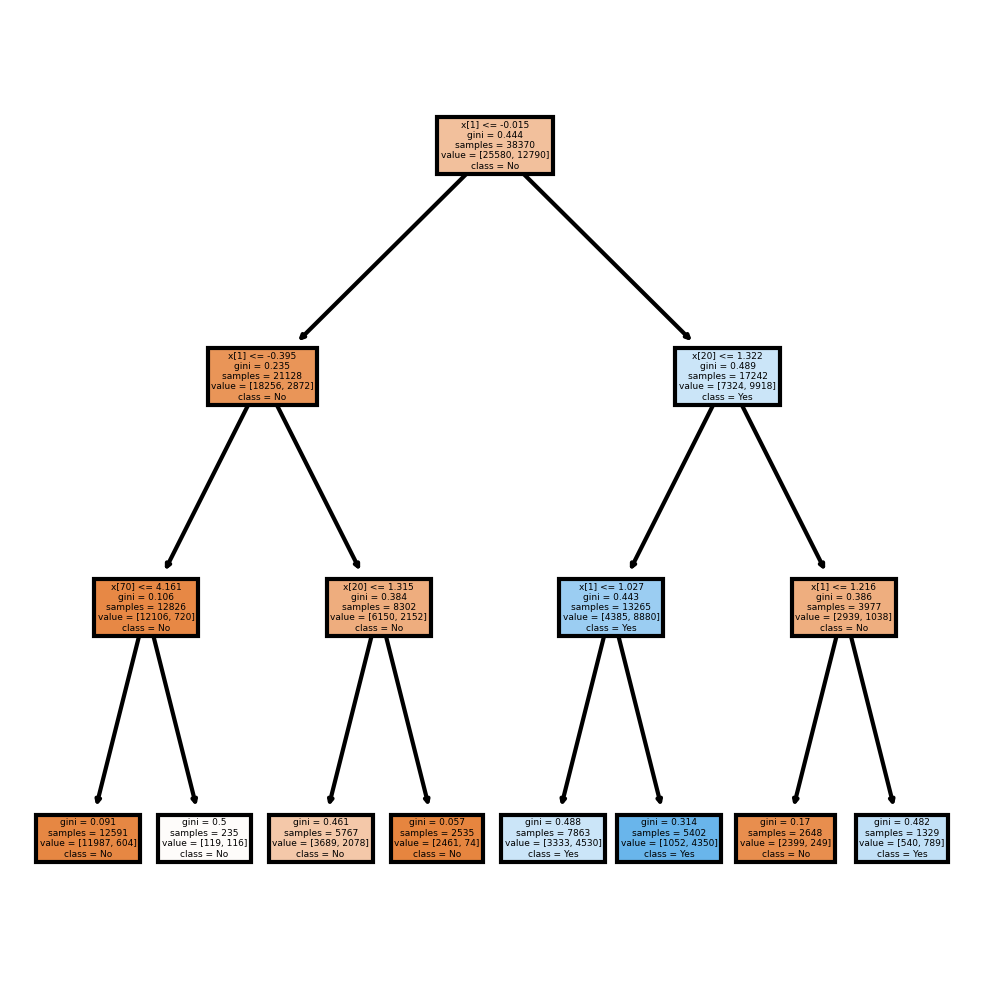

In [66]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree,  filled = True, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [67]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_tree = confusion_matrix(y_true, y_pred)

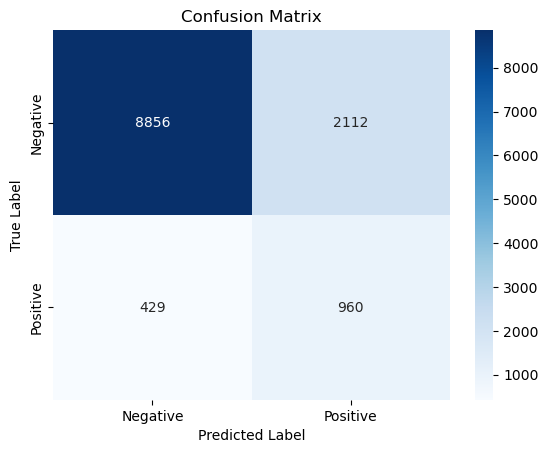

In [69]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [80]:
bagging = BaggingClassifier(estimator = dtree_base, n_estimators = 100, max_samples = 0.5, max_features = 1)

bagging.fit(X_scaled, y_train)

ypred_bag = bagging.predict(X_test)

/Users/haydenpeoples/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
y_true = y_test
cm_bag = confusion_matrix(y_true, ypred_bag)

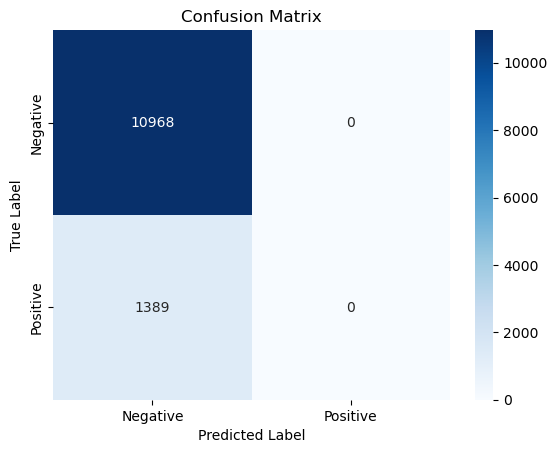

In [84]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
boost = AdaBoostClassifier(estimator = dtree, n_estimators = 50)

boost_model = boost.fit(X_scaled, y_train)

ypred_boost = boost_model.predict(X_test)

/Users/haydenpeoples/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
y_pred = boost_model.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

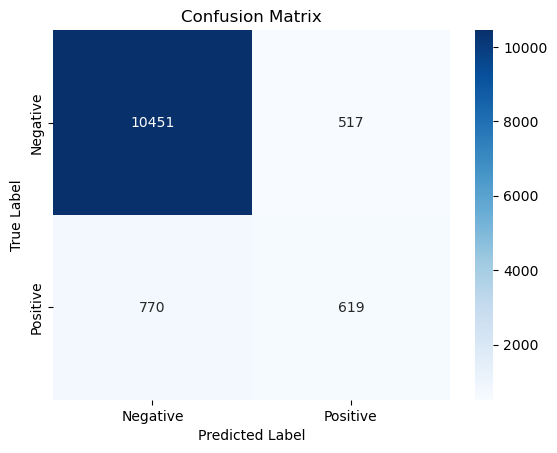

In [89]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Train a logistic regression on decision, boosted, and bagged tree

# interpret coefficient and significance

In [40]:
pip install mlens

Note: you may need to restart the kernel to use updated packages.


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#from mlens.ensemble import SuperLearner

In [91]:

X_baselearners = [list(bagging.predict(X_train)), list(boost.predict(X_train)), list(dtree.predict(X_train))]

/Users/haydenpeoples/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
/Users/haydenpeoples/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
/Users/haydenpeoples/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [100]:
#make a dictionary object to store the three different models

data = {
    "Intercept": np.ones(len(y_train)), 
    'Dtree': dtree.predict(X_scaled),
    'bagging': bagging.predict(X_scaled),
    'boosting': boost.predict(X_scaled)
}

data = pd.DataFrame(data)

X_test_super = {
    "Intercept": np.ones(len(X_test)), 
    'Dtree': dtree.predict(X_test),
    'bagging': bagging.predict(X_test),
    'boosting': boost.predict(X_test)
}

X_test_super = pd.DataFrame(X_test_super)



In [101]:
superlearner = LogisticRegression()

In [105]:
superlearner_fitted = superlearner.fit(data, y_train)
y_pred_superlearner = superlearner_fitted.predict(X_test_super)

/Users/haydenpeoples/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
superlearner.coef_

array([[-1.25245762e-03,  1.39473293e+00,  0.00000000e+00,
         4.40729543e+00]])

In [109]:
y_true = y_test
cm_superlearner = confusion_matrix(y_true, y_pred_superlearner)

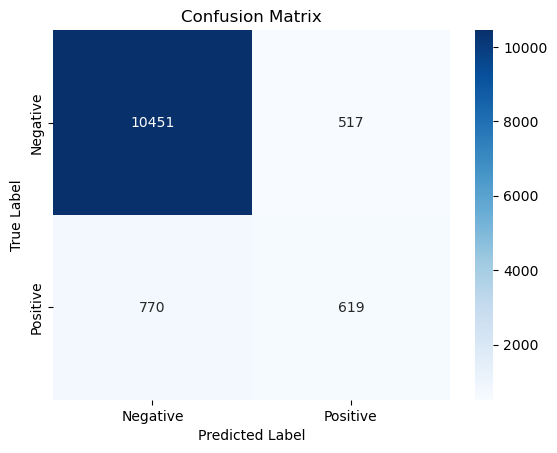

In [110]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The coefficeints tell you how important each model is. We ignore the first set of coefficients, since it is just for the intercepts. The highest coefficient is the one for the boosting model, meaning it is the most important to the superlearner model. The least important to the model is bagging, with a coefficient of zero.


We also observe how the confusion matrix for the superlearner model is the same as the one for the boosting model, showing us just how important the boosting model is. 

# 6.)